# Expected Calibration Error

> How  much can you trust your classifiers's confidences.

A classifier is said to be well calibrated if the confidence of its prediction reflects the actual errors in its prediction. i.e of all the prediction with 90% confidence, how many are right predictions. If the fraction of predictions with 90% confidence is also 90%, then the model is well calibrated.

I came across Expected Calibration Error from a recent, aptly titled paper “Your classifier is secretly an energy based model and you should treat it like one”. It is defined as

$$ECE = \sum _{m=1}^{M} \frac{|B_m|}{n} |acc(B_m) - conf(B_m)|$$

To compute ECE we first find all the confidences of prediction from our classifier $\max_y p(y\|x_i)$. Then we divide the probability range $[0,1]$ into $M$ equally spaced bins. My experiments with $M=20$ to $2000$ provided not much significance in result. So all report here are with $M=20$.

Here is the code to compute ECE which also makes a wonderful plot of accuracy vs confidence.

## Code

In [4]:
# hide
from fastai.vision import *
from fastai.metrics import error_rate
import fastai
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [5]:
M=20
delta = 1/M
def get_caliberation(probs,targets, M=10):
    
    L = [
        (t.item(), p.argmax().item(),p.max().item())
        for p,t in zip(probs,targets)
    ]
    
    n = len(L)
    delta = 1.0/M
    D = []
    P = []
    
    for l,h in zip(np.arange(0.0,1.0,delta),np.arange(0.0+delta,1.0+delta,delta)):
        
        LL = list(filter(lambda r:l<=r[2]<h,L))
        bin_size = len(LL)
        if bin_size==0:
            # nothing in bin
            continue
            
        acc  = np.mean([p==t for (t,p,pr) in LL])
        conf = np.mean([pr for (t,p,pr) in LL])
        
        calib_interval = bin_size/n*abs(acc-conf)
        
        P.append((l,acc))
        D.append(calib_interval)
    x,y = zip(*P)
    return x,y,np.sum(D)

In [6]:
# data
path = untar_data(URLs.IMAGEWOOF_160)
tfms = get_transforms()
data = ImageDataBunch.from_folder(path, train='train', valid='val', ds_tfms = tfms,size=160)
learner = cnn_learner(data, models.resnet18, metrics=[accuracy, error_rate])

In [ ]:
# learner
learner.freeze()
learner.fit(10)
learner.save('stage-1')

In [8]:
# hide
learner.load('stage-1');

In [9]:
# predictions
probs, targets = learner.get_preds()
x,y,ece = get_caliberation(probs,targets,M=M)

Now lets plot the accuracy vs confidences of the classifier

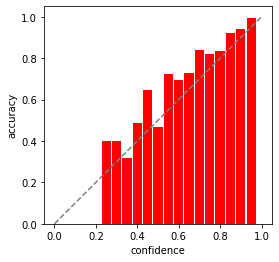

In [10]:
# plot
axes = plt.gca()
axes.set_xlim([0,1.0])
axes.set_ylim([0,1.0])
axes.set_xlabel("confidence")
axes.set_ylabel("accuracy")
axes.axis('equal')
axes.set_aspect('equal', 'box')
plt.bar(x,y,width=0.9*delta,color="red")#,"ob")
plt.plot([0,1],[0,1],"--",color="grey")
plt.show()

In [12]:
# hide
! nbdev_nb2md 2020-01-20-expected-caliberation-error.ipynb 
! python finalise.py 2020-01-20-expected-caliberation-error.md 
! cp -r 2020-01-20-expected-caliberation-error_files ../images/
! rm -r 2020-01-20-expected-caliberation-error_files

2020-01-20-expected-caliberation-error_files/
